In [1]:
#now id like to figure out a way to do that without having to reopen the figure every time# 
#make the original surface#
import numpy as np
from mayavi import mlab
import mayavi
import random
from numpy import array
from mayavi.api import Engine
num_points=0
feather_number=0
#define the feather matrix#
feather_matrix=np.zeros([3,3,1])
temp_feather_matrix=np.zeros([3,4,1])
#initialize the image#
engine = Engine()
engine.start()
if len(engine.scenes) == 0:
    engine.new_scene()
# ------------------------------------------- 
scene = engine.scenes[0]
poly_data_reader = engine.open('/Users/tylerthompson/Desktop/Research/Feather_Project/ascii_feather_cow2.stl', scene)
from mayavi.modules.surface import Surface
surface = Surface()
engine.add_filter(surface, poly_data_reader)

def picker_callback(picker):
    global scene
    x=picker.mapper_position[0]
    y=picker.mapper_position[1]
    z=picker.mapper_position[2]
    global prev_cam_pos
    global prev_focal_point
    global prev_view_angle
    global prev_cam_view_up
    global prev_cam_clipping_range
    global feather_number
    global temp_feather_matrix
    global feather_matrix
    prev_cam_pos=scene.scene.camera.position
    prev_focal_point=scene.scene.camera.focal_point
    prev_view_angle=scene.scene.camera.view_angle
    prev_cam_view_up=scene.scene.camera.view_up
    prev_cam_clipping_range=scene.scene.camera.clipping_range
    mlab.points3d(x,y,z,color=(1,0,0),resolution=20,scale_factor=.01)
    scene.scene.camera.position=prev_cam_pos
    scene.scene.camera.focal_point=prev_focal_point
    scene.scene.camera.view_up=prev_cam_view_up
    scene.scene.camera.view_angle=prev_view_angle
    scene.scene.camera.clipping_range=prev_cam_clipping_range
    scene.scene.camera.compute_view_plane_normal()
    global num_points
    num_points=num_points+1
    print(num_points)
    mayavi.mlab.draw(figure=None)
    temp_feather_matrix[:,num_points-1,0]=[x,y,z]
    #now I want to be able to close the scene#
    if num_points==4:
        #mayavi.mlab.close(all=True)
        num_points=0
        check=input('Are those points good?')
        if check=='y':
            temp_feather_matrix=temp_feather_matrix[:,0:3,0]
            temp_feather_matrix=np.reshape(temp_feather_matrix,[3,3,1])
            feather_matrix=np.concatenate((feather_matrix,temp_feather_matrix),2)
            feather_number=feather_number+1
            temp_feather_matrix=np.zeros([3,4,1])
            scene.children[len(scene.children)-1:len(scene.children)]=[]

        if check=='n':
            scene.children[len(scene.children)-4:len(scene.children)]=[]
            
        if check=='quit':
            mayavi.mlab.close(all=True)
            feather_matrix=np.delete(feather_matrix,0,2)


            
        


picker=scene.on_mouse_pick(picker_callback)
picker.tolerance = 0.001
mlab.show()

1


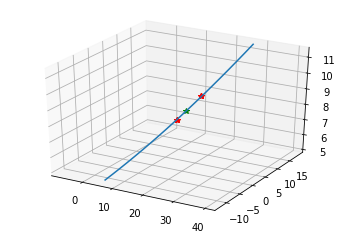

In [3]:
#so that code snippet will generate the points corresponding to the feathers#
#now, we want to take the points in the feather matrix, and interpolate them#
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D

np.shape(feather_matrix)
x_pts_tobeinterp=feather_matrix[0,:,1]
y_pts_tobeinterp=feather_matrix[1,:,1]
z_pts_tobeinterp=feather_matrix[2,:,1]

tck,u=interpolate.splprep([x_pts_tobeinterp,y_pts_tobeinterp,z_pts_tobeinterp],k=2,s=2)
x_knots, y_knots, z_knots = interpolate.splev(tck[0], tck)
u_fine = np.linspace(-3,3,20)
x_fine, y_fine, z_fine = interpolate.splev(u_fine, tck)

fig=plt.figure(1)
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot(x_pts_tobeinterp, y_pts_tobeinterp, z_pts_tobeinterp, 'g*')
ax3d.plot(x_knots, y_knots, z_knots, 'r*')
ax3d.plot(x_fine, y_fine, z_fine)
ax3d.axis('equal')

fig.show()



In [ ]:
#now I have the point, I want to plot them back#
#now id like to figure out a way to do that without having to reopen the figure every time# 
#make the original surface#
import numpy as np
from mayavi import mlab
import mayavi
import random
from numpy import array
from mayavi.api import Engine
num_points=0
feather_number=0
#define the feather matrix#
feather_matrix=np.zeros([3,3,1])
temp_feather_matrix=np.zeros([3,4,1])
#initialize the image#
engine = Engine()
engine.start()
if len(engine.scenes) == 0:
    engine.new_scene()
# ------------------------------------------- 
scene = engine.scenes[0]
poly_data_reader = engine.open('/Users/tylerthompson/Desktop/Research/Feather_Project/basic_pigeon.stl', scene)
from mayavi.modules.surface import Surface
surface = Surface()
engine.add_filter(surface, poly_data_reader)
white_glyphs=mlab.points3d(x_fine,y_fine,z_fine,color=(0,0,1),resolution=20,scale_factor=1)

def picker_callback(picker):
    global scene
    x=picker.mapper_position[0]
    y=picker.mapper_position[1]
    z=picker.mapper_position[2]
    global prev_cam_pos
    global prev_focal_point
    global prev_view_angle
    global prev_cam_view_up
    global prev_cam_clipping_range
    global feather_number
    global temp_feather_matrix
    global feather_matrix
    prev_cam_pos=scene.scene.camera.position
    prev_focal_point=scene.scene.camera.focal_point
    prev_view_angle=scene.scene.camera.view_angle
    prev_cam_view_up=scene.scene.camera.view_up
    prev_cam_clipping_range=scene.scene.camera.clipping_range
    mlab.points3d(x,y,z,color=(1,0,0),resolution=20,scale_factor=1)
    scene.scene.camera.position=prev_cam_pos
    scene.scene.camera.focal_point=prev_focal_point
    scene.scene.camera.view_up=prev_cam_view_up
    scene.scene.camera.view_angle=prev_view_angle
    scene.scene.camera.clipping_range=prev_cam_clipping_range
    scene.scene.camera.compute_view_plane_normal()
    global num_points
    num_points=num_points+1
    print(num_points)
    mayavi.mlab.draw(figure=None)
    temp_feather_matrix[:,num_points-1,0]=[x,y,z]
    #now I want to be able to close the scene#
    if num_points==4:
        #mayavi.mlab.close(all=True)
        num_points=0
        check=input('Are those points good?')
        if check=='y':
            temp_feather_matrix=temp_feather_matrix[:,0:3,0]
            temp_feather_matrix=np.reshape(temp_feather_matrix,[3,3,1])
            feather_matrix=np.concatenate((feather_matrix,temp_feather_matrix),2)
            feather_number=feather_number+1
            temp_feather_matrix=np.zeros([3,4,1])
            scene.children[len(scene.children)-1:len(scene.children)]=[]

        if check=='n':
            scene.children[len(scene.children)-4:len(scene.children)]=[]
            
        if check=='quit':
            mayavi.mlab.close(all=True)
            feather_matrix=np.delete(feather_matrix,0,2)


            
        


picker=scene.on_mouse_pick(picker_callback)
picker.tolerance = 0.001
mlab.show()

In [10]:
#Now we need to figure out where they synthesized feather intersects the surface#
synth_feather_points=[x_fine,y_fine,z_fine]

#Generate the points that correspond to the surface of the pigeon#

import numpy as np
from stl import mesh
surface_mesh = mesh.Mesh.from_file('/Users/tylerthompson/Desktop/Research/Feather_Project/featherless_basic_pigeon.stl')
[faces,v_points]=np.shape(surface_mesh)
#go through there and get the points#
vertex_coords=np.zeros([3*faces,3])
for kk in range(0,3*faces,3):
    #form the vector#
    point_list=surface_mesh[np.int(kk/3),:]
    point_list=np.reshape(point_list,[3,3])
    vertex_coords[kk:kk+3,:]=point_list
print("Vertices Acquired")
    #now remove duplicates#
temp_vertices=set(tuple(x) for x in vertex_coords)
print('Set Made')
sparce_verts=np.array([list(x) for x in temp_vertices])
print('Sparse Vertices Acquired')
xs=sparce_verts[0::5,0]
ys=sparce_verts[0::5,1]
zs=sparce_verts[0::5,2]
del temp_vertices
del sparce_verts
import numpy
from mayavi import mlab
from mayavi.mlab import *
print('Plotting')
points3d(xs,ys,zs,scale_factor=0.3)
mlab.show()

KeyboardInterrupt: 